In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
#reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
#Find most recent date in the data set
most_recent_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

print(most_recent_date)

('2017-08-23',)


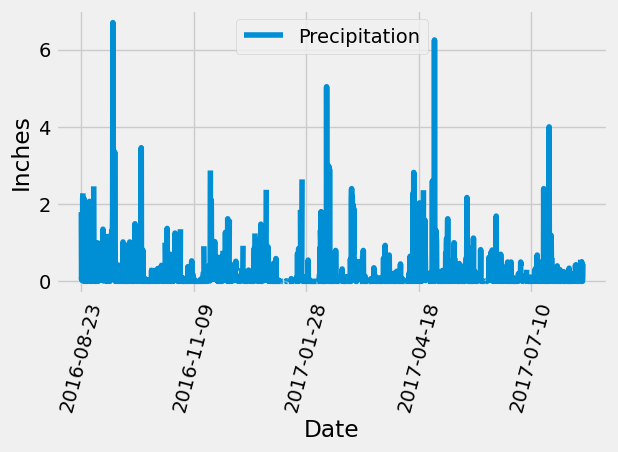

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_from_date = dt.date(2017,8,23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
prec_scores = session.query(Measurement.date, Measurement.prcp).\
                                filter(Measurement.date >= year_from_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

prec_scores_df = pd.DataFrame(prec_scores, columns= ['Date', 'Precipitation']).set_index('Date')

# Sort the dataframe by date
prec_scores_df = prec_scores_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
prec_scores_df.plot(rot=75)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_scores_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
total_number_stations= session.query(Station.station).count()
total_number_stations

9

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

print("Most active stations (Station, Count):")
for station, count in active_stations:
    print(f"{station}, {count}")

most_active_station = active_stations[0][0]
print(f"Most active station: {most_active_station}")

Most active stations (Station, Count):
USC00519281, 2772
USC00519397, 2724
USC00513117, 2709
USC00519523, 2669
USC00516128, 2612
USC00514830, 2202
USC00511918, 1979
USC00517948, 1372
USC00518838, 511
Most active station: USC00519281


In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()

print(f"Lowest temperature: {lowest_temp}")
print(f"Highest temperature: {highest_temp}")
print(f"Average temperature: {avg_temp}")

Lowest temperature: 54.0
Highest temperature: 85.0
Average temperature: 71.66378066378067


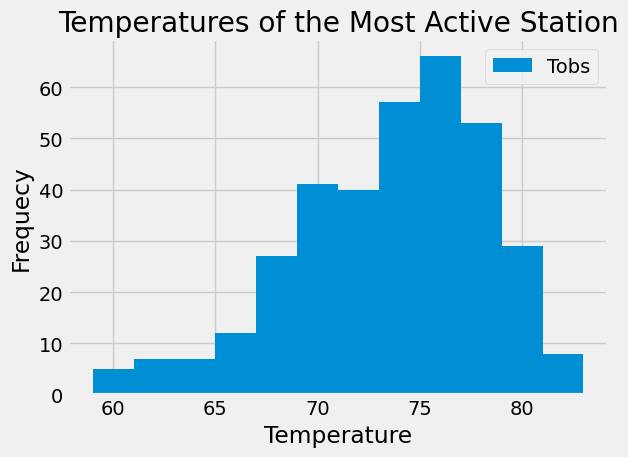

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_temps = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').\
                            filter(Measurement.date >= year_from_date).all()


temperatures_df = pd.DataFrame(active_station_temps)

temperatures_df.plot(kind="hist", bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequecy")
plt.title("Temperatures of the Most Active Station")
plt.legend(["Tobs"])
plt.tight_layout()
plt.show()

In [23]:
# Close Session
session.close()